In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
os.chdir('C:/Users/admin/Desktop') 
data_dir = "uygulama/"
pos_dir = os.path.join(data_dir, "pozitif")
neg_dir = os.path.join(data_dir, "negatif")
images = []
labels = []

In [3]:
pos_images = [os.path.join(pos_dir, filename) for filename in os.listdir(pos_dir) if filename.endswith('.jpg')]

neg_images = [os.path.join(neg_dir, filename) for filename in os.listdir(neg_dir) if filename.endswith('.jpg')]

In [4]:
for img_path in pos_images:
    with open(img_path, 'rb') as f:
        img = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_UNCHANGED)
    images.append(img)
    labels.append(1)  # Pozitif sınıf için 1

for img_path in neg_images:
    with open(img_path, 'rb') as f:
        img = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_UNCHANGED)
    images.append(img)
    labels.append(0)  # Negatif sınıf için 0

In [5]:
images = np.array(images)
labels = np.array(labels)

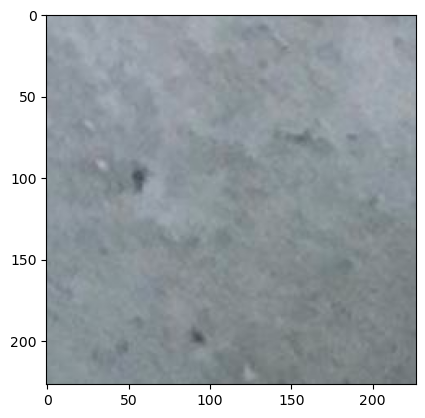

In [6]:
plt.imshow(images[39999])
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

input_shape = (227, 227, 3)
num_classes = 2

In [8]:
model = Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
 14/800 [..............................] - ETA: 3:48:06 - loss: 115.8395 - accuracy: 0.4754